# Titanic: Machine Learning from Disaster
- https://www.kaggle.com/c/titanic/
- one of the best topic
  - https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/notebook

In [4]:
# pandas
import pandas as pd
from pandas import Series, DataFrame

# numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()
print("-------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare         

In [7]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis='columns')
test_df = test_df.drop(['Name', 'Ticket'], axis='columns')

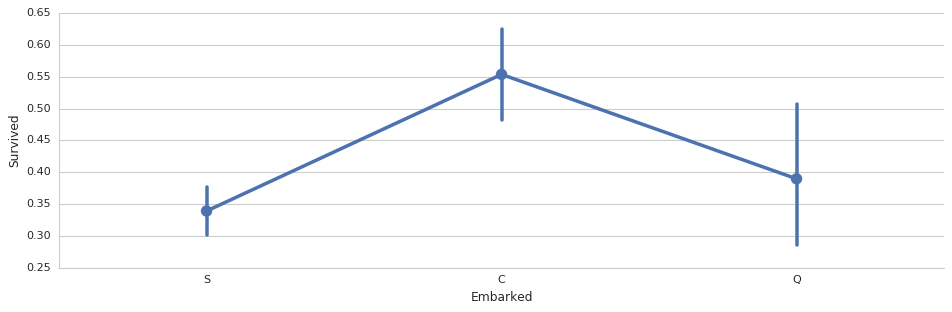

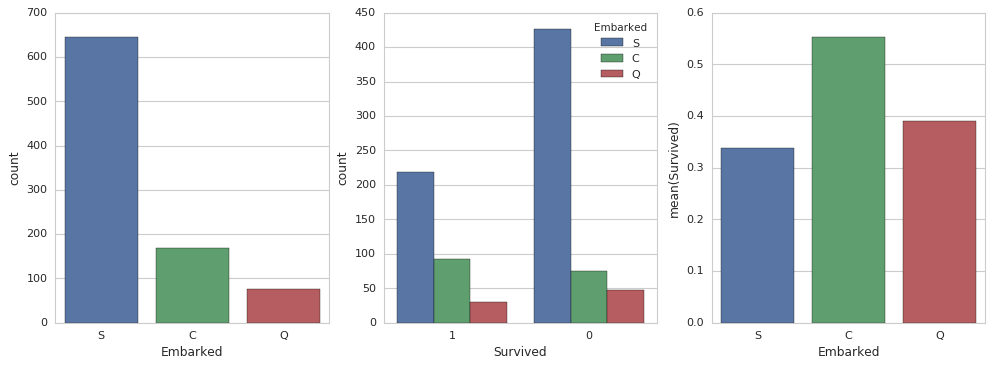

In [8]:
# Embarked

# only in titanic_df, fill the two missing values with the most occured value, which is "5".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot("Embarked", "Survived", data=titanic_df, size=4, aspect=3)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15,5))

# sns.factorplot("Embarked", data=titanic_df, kind='count', order=['S', 'C', 'Q'], ax=axis1)
# sns.factorplot("Survived", hue="Embarked", data=titanic_df, kind='count', order=[1,0], ax=axis2)
sns.countplot(x="Embarked", data=titanic_df, ax=axis1)
sns.countplot(x="Survived", hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embarked_perc = titanic_df[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()
sns.barplot(x="Embarked", y="Survived", data=embarked_perc, order=["S","C","Q"], ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable,
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variable for Embarked columns, just drop it,
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic = pd.get_dummies(titanic_df["Embarked"])
embark_dummies_titanic.drop('S', axis="columns", inplace=True)

embark_dummies_test = pd.get_dummies(test_df["Embarked"])
embark_dummies_test.drop('S', axis="columns", inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop("Embarked", axis="columns", inplace=True)
test_df.drop("Embarked", axis="columns", inplace=True)

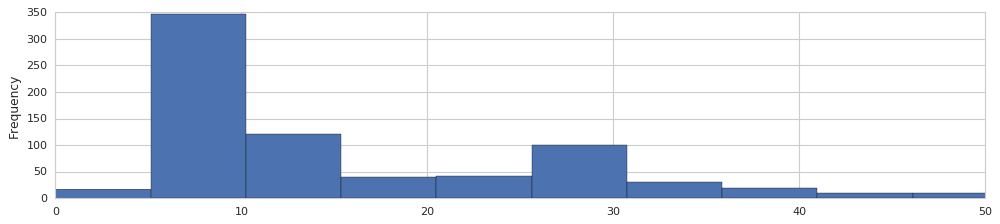

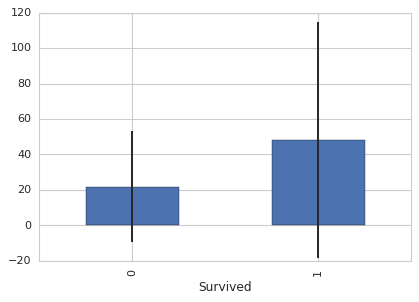

In [9]:
# # Fare

# # only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# # convert from float to int
titanic_df["Fare"] = titanic_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

# get fare for survived & didn't survive passengers
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df["Fare"].plot(kind="hist", figsize=(15,3), bins=100, xlim=(0,50))

average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(kind="bar", yerr=std_fare, legend=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


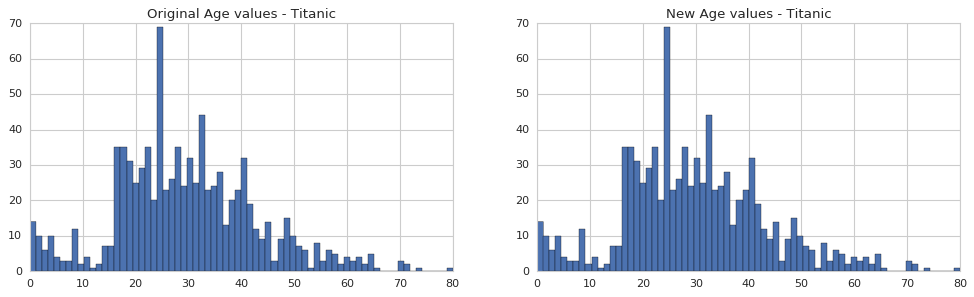

In [18]:
# Age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_df.Age.mean()
std_age_titanic = titanic_df.Age.std()
count_nan_age_titanic = titanic_df.Age.isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test = test_df.Age.mean()
std_age_test = test_df.Age.std()
count_nan_age_test = test_df.Age.isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size=count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df["Age"].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df["Age"].dropna().astype(int).hist(bins=70, ax=axis1)

# full NaN values in Age column with random values generated
titanic_df['Age'][np.isnan(titanic_df["Age"])] = rand_1
test_df['Age'][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df["Age"] = titanic_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

# plot new Age values
titanic_df["Age"].hist(bins=70, ax=axis2)

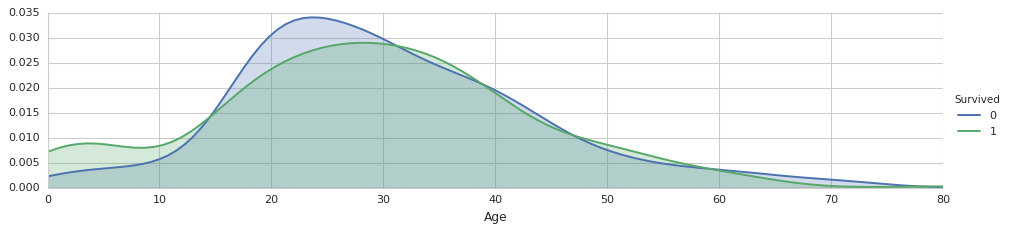

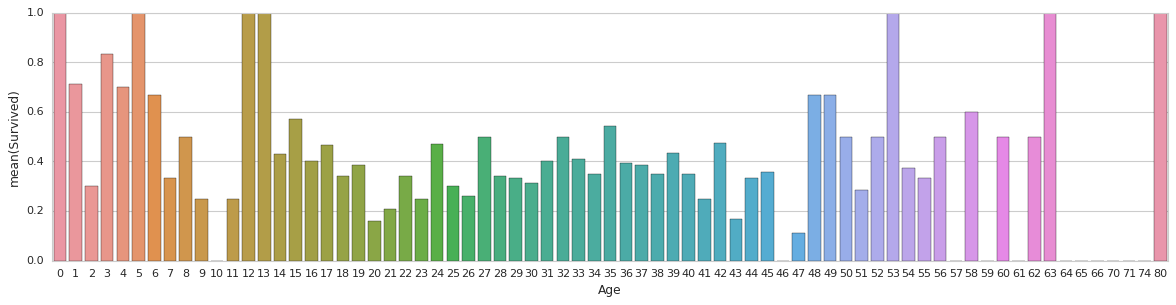

In [20]:
# ... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passenders by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby("Age", as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [21]:
# Cabin
# It has a lot of NaN values, so it won't causme a remarkable impact on prediction
titanic_df.drop("Cabin", axis="columns", inplace=True)
test_df.drop("Cabin", axis="columns", inplace=True)

In [ ]:
# Family

# Instead of having two columns Parch & SibSp,
# We can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
